In [1]:
"""
Probablistic Machine Learning - Task List 3
"""

%matplotlib inline
import math

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
# Utils
def animate_frame_histogram(idx, subplot, get_data_fn):
    subplot.clear()
    sns.distplot(get_data_fn(idx), kde=False)
    
def make_animation(animation_fn, begin_idx, nb_steps, get_data_fn, skip_frame=1):
    fig, plot = plt.subplots(1, 1)
    anim = animation.FuncAnimation(fig, animation_fn,
                                  frames=range(begin_idx, nb_steps, skip_frame),
                                  interval=50,
                                  fargs=(plot, get_data_fn))
    return anim

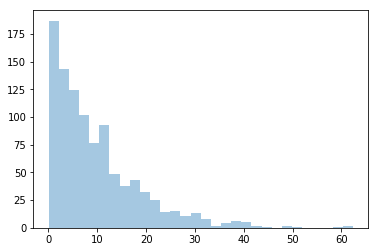

In [3]:
# Exercise 1
# Simple introduction
def generate_samples(k, n, scale=5):
    return np.random.exponential(scale=scale, size=(k, n))


def exercise_1_1(k, n_max, scale):
    means = []
    
    for idx in range(1, n_max + 1):
        samples = generate_samples(k, idx, scale=scale)
        means.append(np.mean(samples, axis=1))
    
    return make_animation(animate_frame_histogram, 
                          0, n_max,
                          lambda i: means[i])
    
        

scale = 10
k = 1000  # nb samples    
n_max = 25  # single sample size
anim = exercise_1_1(k, n_max, scale)
HTML(anim.to_jshtml())

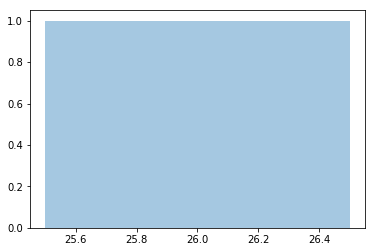

In [4]:
# Bernoulli
def generate_trials(p, nb_trials):
    return np.random.binomial(1, p, nb_trials)

def exercise_1_2(p, nb_trials, nb_repeat):
    nb_successes = []
    for idx in range(nb_repeat):
        nb_successes.append(sum(generate_trials(p, nb_trials)))
    
    return make_animation(animate_frame_histogram,
                          1, nb_repeat,
                          lambda i: nb_successes[:i])
    

P = 0.5
NB_TRIALS = 50
NB_REPEAT = 100
anim = exercise_1_2(P, NB_TRIALS, NB_REPEAT)
HTML(anim.to_jshtml())

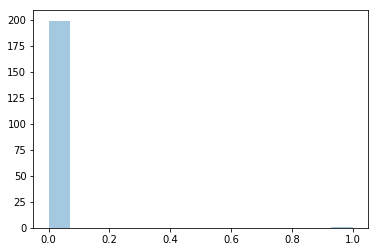

In [12]:
# Multinomial
def exercise_1_3(nb_experiments, nb_probs):
    data = []
    for idx in range(nb_experiments):
        data.append(np.random.multinomial(idx, [1.0/nb_probs] * nb_probs))
    
    return make_animation(animate_frame_histogram,
                          1, nb_experiments,
                          lambda i: data[i],
                          skip_frame=100)
    

NB_EXPERIMENTS = 1000
NB_PROBS = 200
anim = exercise_1_3(NB_EXPERIMENTS, NB_PROBS)
HTML(anim.to_jshtml())